# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [8]:
# Load .env enviroment variables
load_dotenv("newskey.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $81650.35
The current value of your 5.3 ETH is $22338.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
df_investments.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-12-11 00:00:00-05:00  118.01  118.090  117.9500  118.03  5537449  364.90   
2020-12-14 00:00:00-05:00  117.86  118.025  117.7969  117.97  3047181  368.64   
2020-12-15 00:00:00-05:00  117.95  118.030  117.9000  118.03  3826081  367.40   
2020-12-16 00:00:00-05:00  117.83  118.033  117.7610  117.97  4415156  369.82   
2020-12-17 00:00:00-05:00  118.01  118.060  117.7299  117.84  6187968  371.94   

                                                                 
                               high       low   close    volume  
time                                                             
2020-12-11 00:00:00-05:00  366.7402  363.2600  366.28  47917103  
2020-12-14 00:00:00-05:00  369.8000  364.4700  364.61  54732478  
2020-12-15 00:00:00-05:00  369.5798  365.9200  369.57  50997562  
2020-12-16 00:00:00-05:00  371.1600  368.8676  370.14  47524603  
2020-12-17 00:00:00-05:00  372.4600  371.0500  372.21  50863245

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.03
Current SPY closing price: $366.28


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18314.00
The current value of your 200 AGG shares is $23606.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,103988.813301
shares,41920.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

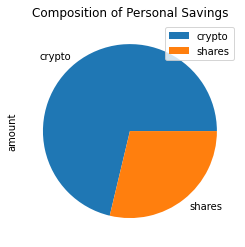

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [23]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.012851e+00,1.002789e+00,9.834923e-01,9.942603e-01,1.005426e+00,9.877776e-01,9.933884e-01,1.010171e+00,1.030585e+00,9.923458e-01,...,1.021145e+00,1.011886e+00,1.006080e+00,9.806650e-01,1.003138e+00,1.013520e+00,1.008803e+00,1.008526e+00,1.010889e+00,1.002945e+00
2,1.018276e+00,1.032418e+00,9.842679e-01,1.001991e+00,1.020898e+00,1.010509e+00,1.003090e+00,9.846916e-01,1.046658e+00,1.013390e+00,...,1.009184e+00,9.995112e-01,1.003787e+00,9.925083e-01,9.987139e-01,1.006508e+00,1.011044e+00,9.977626e-01,1.029283e+00,1.015183e+00
3,1.010635e+00,1.044811e+00,1.009473e+00,1.001762e+00,1.014253e+00,1.000621e+00,1.008041e+00,9.976483e-01,1.039217e+00,1.014906e+00,...,1.013662e+00,9.891773e-01,1.000096e+00,1.001372e+00,9.962518e-01,1.029772e+00,1.003161e+00,1.003451e+00,1.009822e+00,1.011441e+00
4,1.049020e+00,1.051935e+00,1.030702e+00,1.004719e+00,1.001246e+00,9.909754e-01,1.010233e+00,1.009779e+00,1.042312e+00,1.009622e+00,...,1.033390e+00,9.984706e-01,1.006496e+00,1.003266e+00,9.987655e-01,1.034875e+00,9.975958e-01,9.993006e-01,1.001233e+00,1.021834e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.634597e+07,3.304726e+08,1.586855e+08,4.395489e+08,3.797536e+07,3.694570e+08,3.557689e+08,2.732640e+08,3.180143e+08,1.623698e+08,...,4.176415e+07,8.672055e+08,2.564939e+08,6.424122e+07,4.709813e+07,7.311569e+08,7.004981e+08,2.328105e+08,9.527868e+08,4.057393e+08
7557,4.635143e+07,3.374966e+08,1.596651e+08,4.391376e+08,3.806996e+07,3.744098e+08,3.585767e+08,2.741662e+08,3.237696e+08,1.610772e+08,...,4.217940e+07,8.546295e+08,2.572782e+08,6.519335e+07,4.705945e+07,7.016140e+08,7.133615e+08,2.312954e+08,9.509435e+08,4.072329e+08
7558,4.672249e+07,3.374068e+08,1.621001e+08,4.504180e+08,3.867966e+07,3.783747e+08,3.637460e+08,2.751721e+08,3.274708e+08,1.646530e+08,...,4.255493e+07,8.691998e+08,2.551833e+08,6.603860e+07,4.701772e+07,7.071410e+08,7.130136e+08,2.335896e+08,9.572088e+08,4.113518e+08
7559,4.665554e+07,3.379917e+08,1.642534e+08,4.484300e+08,3.894836e+07,3.757843e+08,3.646154e+08,2.722953e+08,3.250727e+08,1.680296e+08,...,4.229705e+07,8.645995e+08,2.554219e+08,6.540590e+07,4.748472e+07,7.075026e+08,7.218376e+08,2.324618e+08,9.593098e+08,4.132728e+08


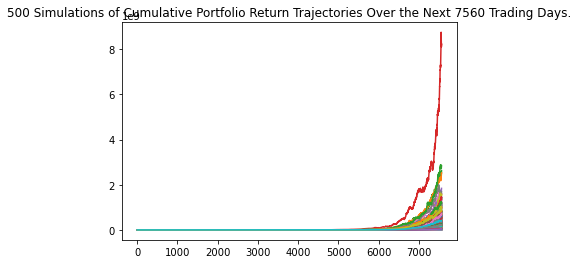

In [28]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

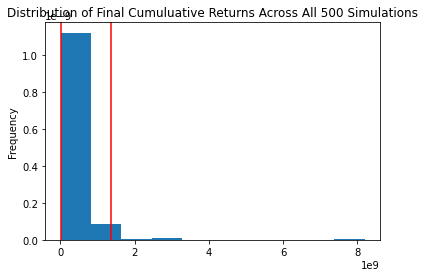

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5.000000e+02
mean            3.276000e+08
std             5.062615e+08
min             8.870842e+06
25%             8.727764e+07
50%             1.805679e+08
75%             3.953381e+08
max             8.200230e+09
95% CI Lower    2.009130e+07
95% CI Upper    1.361004e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $401826082907.41 and $27220088441023.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $602739124361.12 and $40830132661535.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003812,1.001908,1.003433,0.999521,1.007872,1.003459,1.001099,1.003297,1.000195,1.003434,...,1.002897,1.002761,1.004207,1.000041,0.994343,0.997097,1.004454,1.002293,1.001108,1.005914
2,1.001255,1.011248,0.998693,1.008942,1.011531,1.001537,1.008893,0.994782,0.998895,1.003241,...,1.003479,1.004321,1.014517,1.001598,0.997731,1.006086,1.005841,1.003473,1.000100,1.005986
3,1.003567,1.025625,1.009626,1.014655,1.010552,0.999566,1.008608,0.996041,1.004548,1.008508,...,1.013837,1.002467,1.018329,1.002068,1.004912,0.994509,1.000889,1.001035,1.006074,0.999331
4,1.000554,1.028599,1.005044,1.017932,1.013747,1.001265,1.007007,0.994521,1.015222,0.996037,...,1.009209,1.005592,1.021772,1.007767,1.002230,1.004261,1.001018,1.010468,1.003377,1.005435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,8.076999,6.969809,8.251973,8.553166,8.472709,7.144848,7.092992,9.675748,7.789974,7.648504,...,7.907445,7.039039,7.322863,9.542653,10.713103,6.798196,5.067271,7.984779,5.699365,7.236464
1257,8.049154,6.955717,8.249604,8.552299,8.407176,7.145334,7.156177,9.704976,7.780632,7.628577,...,7.876364,7.009205,7.378321,9.545039,10.615434,6.843204,5.099073,8.026007,5.683335,7.270261
1258,8.055973,6.975303,8.285939,8.594141,8.518717,7.196760,7.213892,9.794449,7.834440,7.624723,...,7.875912,7.008434,7.368693,9.587505,10.623335,6.846840,5.105757,8.100896,5.661703,7.313595
1259,8.027303,6.946085,8.254103,8.498708,8.486387,7.242852,7.210219,9.887434,7.894046,7.693796,...,7.943549,7.014533,7.372861,9.567529,10.693922,6.899280,5.100961,8.046857,5.698269,7.290732


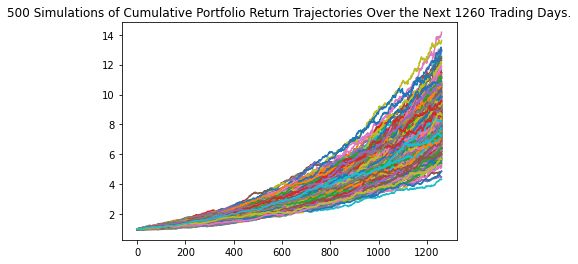

In [36]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

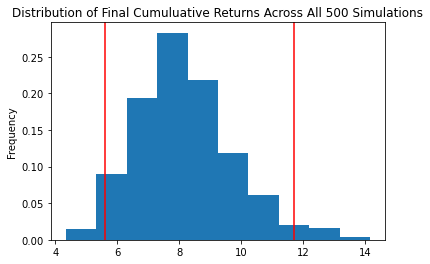

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              8.164548
std               1.565522
min               4.337100
25%               7.136493
50%               7.975248
75%               9.038626
max              14.166351
95% CI Lower      5.609476
95% CI Upper     11.709085
Name: 1260, dtype: float64


In [39]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $336568.58 and $702545.13


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999275,0.999702,1.000916,0.995662,0.994811,1.005375,1.008417,1.000578,1.014689,0.999395,...,0.995290,1.004207,1.004050,0.999635,0.999541,1.004536,1.007694,1.007511,1.004404,0.997670
2,1.002000,1.007296,0.993922,0.995039,0.989761,0.996977,1.010063,1.003211,1.010779,0.998608,...,0.994949,0.997949,1.006614,0.993808,0.996453,1.015754,1.002680,1.002339,1.014478,0.990153
3,1.002330,1.006232,0.995789,1.004118,0.999332,0.996590,1.003148,0.997619,1.013277,0.987712,...,0.994297,0.980564,1.004853,0.998316,0.989256,1.020721,1.000379,1.007677,1.020513,0.998590
4,0.999920,0.999144,0.995245,1.009334,1.001064,0.989937,1.001355,0.996434,1.017118,0.985478,...,1.002060,0.978754,0.999543,0.993705,0.991254,1.021274,1.010785,1.013940,1.024488,1.000222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,36.846389,43.970759,52.757429,50.313026,90.636106,57.266334,60.292793,62.228411,50.169424,53.320575,...,62.873302,95.851698,50.342047,95.530313,47.978531,71.249430,64.712806,68.142293,50.090480,65.091210
2517,36.838552,44.598044,52.848530,50.367769,91.212219,57.236130,59.936365,62.067352,50.604097,53.798768,...,63.014589,95.802615,50.684332,95.097452,48.224754,71.237380,65.006209,67.603458,50.111861,65.417612
2518,36.760638,44.217272,52.907160,50.445236,90.410186,56.874858,59.899519,62.175101,51.122259,54.247709,...,63.152318,95.670062,50.457479,94.887980,48.719107,71.439177,64.891042,67.529315,49.963493,65.543390
2519,36.653549,44.433137,53.236046,50.256510,91.294307,57.001621,60.046206,62.556733,51.244178,54.986761,...,63.347169,96.507293,50.387949,95.628553,48.450245,71.557156,65.459022,67.791193,50.156898,65.098395


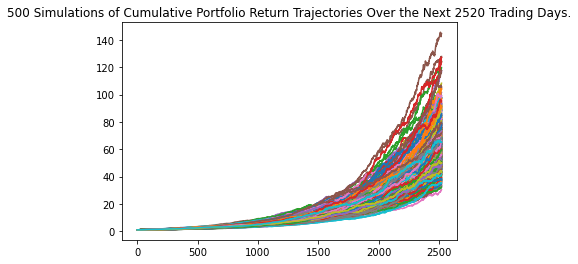

In [42]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

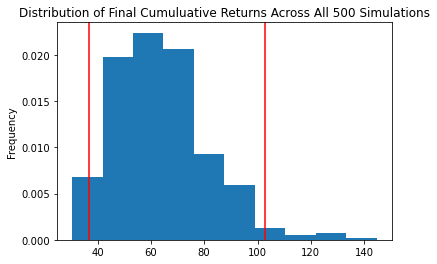

In [43]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean             64.033572
std              17.591620
min              30.465761
25%              50.971493
50%              62.132236
75%              74.366703
max             144.652582
95% CI Lower     36.694462
95% CI Upper    102.768222
Name: 2520, dtype: float64


In [46]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment,2)
ci_upper_ten = round(tbl_ten[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $2201667.74 and $6166093.33
